In [122]:
import pandas as pd
import os

In [123]:
url1 = "https://www.screener.in/company/NIFTY/?page=1"
url2 = "https://www.screener.in/company/NIFTY/?page=2"
url3 = "https://www.screener.in/company/NIFTYJR/?page=1"
url4 = "https://www.screener.in/company/NIFTYJR/?page=2"

In [124]:
def creating_dataframe(url):
    try:
        tables = pd.read_html(url)
        if tables:
            df = tables[0]
            return df
        else:
            ("No tables found on the web page")
    except Exception as e:
        print(f"Error: {e}")

In [125]:
df1 = creating_dataframe(url1)
df2 = creating_dataframe(url2)
df3 = creating_dataframe(url3)
df4 = creating_dataframe(url4)
print('Shape for each dataframe: ',df1.shape,df2.shape,df3.shape)
df = pd.concat([df1,df2,df3,df4], ignore_index=True)
df

Shape for each dataframe:  (27, 11) (27, 11) (27, 11)


,S.No.,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %
0,1.,Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61
1,2.,HDFC Bank,1731.10,19.05,1325385.46,1.13,18340.11,2.31,85040.17,9.01,7.67
2,3.,TCS,3483.90,25.85,1260575.30,1.58,12444.00,5.16,63973.00,5.60,64.28
3,4.,Bharti Airtel,1569.60,46.99,939624.83,0.51,16134.60,230.71,45129.30,19.08,13.13
4,5.,ICICI Bank,1201.00,17.26,848955.76,0.83,13846.89,16.56,47037.12,15.10,7.60
...,...,...,...,...,...,...,...,...,...,...,...
103,47.,NHPC Ltd,73.11,27.12,73488.70,2.60,330.13,-52.49,2286.76,11.25,7.67
104,48.,B H E L,178.90,120.10,62340.68,0.14,134.70,123.31,7277.09,32.22,3.37
105,49.,Adani Total Gas,558.95,92.18,61553.37,0.04,142.38,-19.40,1294.46,11.96,21.20
106,50.,I R C T C,671.05,43.50,53653.10,1.04,341.21,9.90,1224.66,9.51,53.77


In [126]:
df.drop(columns=['S.No.'], inplace=True)
df.set_index('Name',inplace=True)
df.drop(index=['Name','Median: 50 Co.'],inplace=True)
df

,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %
Name,,,,,,,,,
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61
HDFC Bank,1731.10,19.05,1325385.46,1.13,18340.11,2.31,85040.17,9.01,7.67
TCS,3483.90,25.85,1260575.30,1.58,12444.00,5.16,63973.00,5.60,64.28
Bharti Airtel,1569.60,46.99,939624.83,0.51,16134.60,230.71,45129.30,19.08,13.13
ICICI Bank,1201.00,17.26,848955.76,0.83,13846.89,16.56,47037.12,15.10,7.60
...,...,...,...,...,...,...,...,...,...
Canara Bank,81.26,4.49,73787.69,3.96,4255.68,11.19,30750.73,7.93,6.63
NHPC Ltd,73.11,27.12,73488.70,2.60,330.13,-52.49,2286.76,11.25,7.67
B H E L,178.90,120.10,62340.68,0.14,134.70,123.31,7277.09,32.22,3.37


#Only to print duplicate reords

In [127]:
df[:1]

,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %
Name,,,,,,,,,
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61


In [128]:
df = pd.concat([df[:1],df,df[:1]], axis=0)
df[df.duplicated(keep=False)]

,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %
Name,,,,,,,,,
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61


In [129]:
df=df.drop_duplicates()
df

,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %
Name,,,,,,,,,
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61
HDFC Bank,1731.10,19.05,1325385.46,1.13,18340.11,2.31,85040.17,9.01,7.67
TCS,3483.90,25.85,1260575.30,1.58,12444.00,5.16,63973.00,5.60,64.28
Bharti Airtel,1569.60,46.99,939624.83,0.51,16134.60,230.71,45129.30,19.08,13.13
ICICI Bank,1201.00,17.26,848955.76,0.83,13846.89,16.56,47037.12,15.10,7.60
...,...,...,...,...,...,...,...,...,...
Canara Bank,81.26,4.49,73787.69,3.96,4255.68,11.19,30750.73,7.93,6.63
NHPC Ltd,73.11,27.12,73488.70,2.60,330.13,-52.49,2286.76,11.25,7.67
B H E L,178.90,120.10,62340.68,0.14,134.70,123.31,7277.09,32.22,3.37


In [130]:
df.rename(columns = lambda x: x.replace("%","").strip(),inplace=True)
new_columns = ['CMP', 'P/E', 'Market Cap', 'Div Yld', 'Qtr. Net Profit','Qtr. Profit YOY', 'Qtr. Net Sales', 'Qtr. Net Sales YOY', 'ROCE']
df.columns= new_columns
df

,CMP,P/E,Market Cap,Div Yld,Qtr. Net Profit,Qtr. Profit YOY,Qtr. Net Sales,Qtr. Net Sales YOY,ROCE
Name,,,,,,,,,
Reliance Industr,1199.60,23.46,1623410.24,0.42,21930.00,7.38,239986.00,6.62,9.61
HDFC Bank,1731.10,19.05,1325385.46,1.13,18340.11,2.31,85040.17,9.01,7.67
TCS,3483.90,25.85,1260575.30,1.58,12444.00,5.16,63973.00,5.60,64.28
Bharti Airtel,1569.60,46.99,939624.83,0.51,16134.60,230.71,45129.30,19.08,13.13
ICICI Bank,1201.00,17.26,848955.76,0.83,13846.89,16.56,47037.12,15.10,7.60
...,...,...,...,...,...,...,...,...,...
Canara Bank,81.26,4.49,73787.69,3.96,4255.68,11.19,30750.73,7.93,6.63
NHPC Ltd,73.11,27.12,73488.70,2.60,330.13,-52.49,2286.76,11.25,7.67
B H E L,178.90,120.10,62340.68,0.14,134.70,123.31,7277.09,32.22,3.37


In [131]:
for i in df.columns:
    df[i] = df[i].astype(float)

In [132]:
df.columns

Index(['CMP', 'P/E', 'Market Cap', 'Div Yld', 'Qtr. Net Profit',
       'Qtr. Profit YOY', 'Qtr. Net Sales', 'Qtr. Net Sales YOY', 'ROCE'],
      dtype='object')

In [133]:
df.iloc[0,0]

np.float64(1199.6)

In [134]:
df.loc['Life Insurance','CMP']

np.float64(740.35)

In [135]:
df.describe()

,CMP,P/E,Market Cap,Div Yld,Qtr. Net Profit,Qtr. Profit YOY,Qtr. Net Sales,Qtr. Net Sales YOY,ROCE
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,2469.661700,41.607300,2.362759e+05,1.482600,3114.253000,14.795300,27747.147500,8.87540,20.476700
std,4272.626352,39.761257,2.635902e+05,2.028381,4256.419154,46.742563,43140.213455,16.68848,20.196579
min,73.110000,4.490000,5.365310e+04,0.000000,59.000000,-96.890000,126.330000,-82.84000,1.140000
25%,425.287500,17.802500,9.881903e+04,0.347500,545.217500,-4.425000,4748.937500,2.79250,9.800000
50%,1093.900000,29.910000,1.442901e+05,0.795000,1356.440000,8.760000,12984.825000,8.93000,14.670000
75%,2602.362500,57.447500,2.353769e+05,1.617500,4078.322500,25.472500,32071.907500,15.31000,24.257500
max,27373.350000,322.680000,1.623410e+06,11.020000,21930.000000,230.710000,239986.000000,64.39000,169.080000


array([[<Axes: title={'center': 'CMP'}>, <Axes: title={'center': 'P/E'}>,
        <Axes: title={'center': 'Market Cap'}>],
       [<Axes: title={'center': 'Div Yld'}>,
        <Axes: title={'center': 'Qtr. Net Profit'}>,
        <Axes: title={'center': 'Qtr. Profit YOY'}>],
       [<Axes: title={'center': 'Qtr. Net Sales'}>,
        <Axes: title={'center': 'Qtr. Net Sales YOY'}>,
        <Axes: title={'center': 'ROCE'}>]], dtype=object)

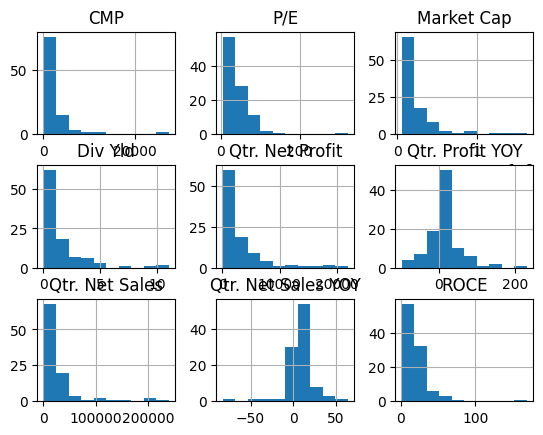

In [136]:
df.hist()

<Axes: >

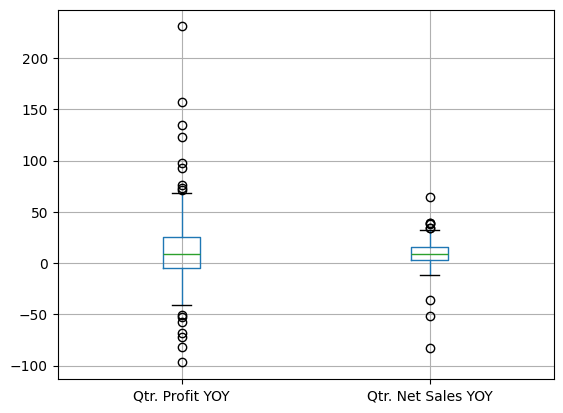

In [137]:
df.boxplot(column=['Qtr. Profit YOY','Qtr. Net Sales YOY'])

<Axes: xlabel='Qtr. Profit YOY', ylabel='Qtr. Net Sales YOY'>

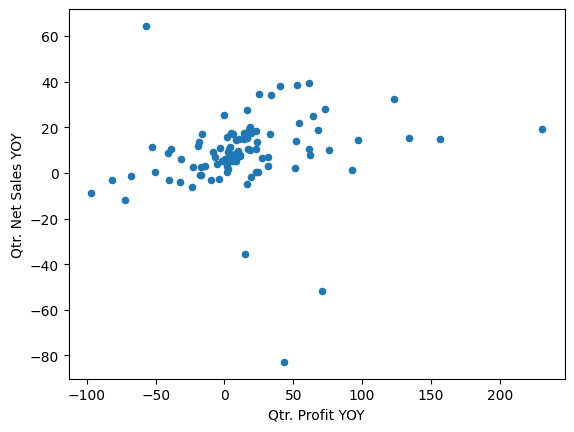

In [138]:
df.plot.scatter(x='Qtr. Profit YOY',y='Qtr. Net Sales YOY')

<Axes: xlabel='Name'>

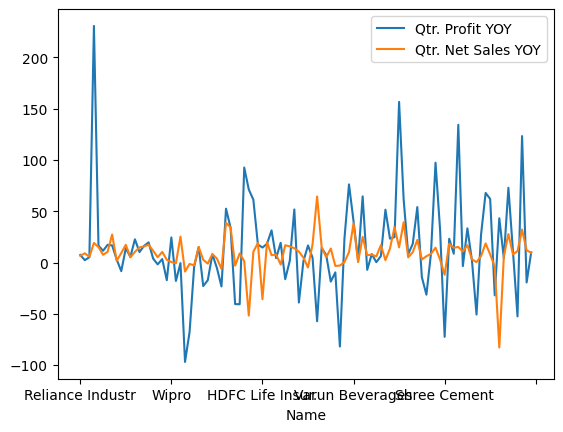

In [139]:
df[['Qtr. Profit YOY','Qtr. Net Sales YOY']].plot.line()

<Axes: xlabel='Name'>

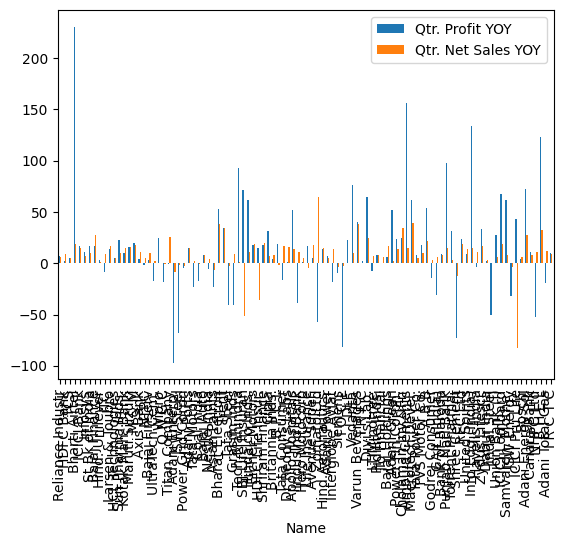

In [140]:
df[['Qtr. Profit YOY','Qtr. Net Sales YOY']].plot.bar()

In [141]:
df.stack()

Name                                
Reliance Industr  CMP                      1199.60
                  P/E                        23.46
                  Market Cap            1623410.24
                  Div Yld                     0.42
                  Qtr. Net Profit         21930.00
                                           ...    
I R C T C         Qtr. Net Profit           341.21
                  Qtr. Profit YOY             9.90
                  Qtr. Net Sales           1224.66
                  Qtr. Net Sales YOY          9.51
                  ROCE                       53.77
Length: 900, dtype: float64

In [142]:
df.unstack()

      Name            
CMP   Reliance Industr    1199.60
      HDFC Bank           1731.10
      TCS                 3483.90
      Bharti Airtel       1569.60
      ICICI Bank          1201.00
                           ...   
ROCE  Canara Bank            6.63
      NHPC Ltd               7.67
      B H E L                3.37
      Adani Total Gas       21.20
      I R C T C             53.77
Length: 900, dtype: float64

In [143]:
def output_file(dataframe, outputfilename):
    file = outputfilename
    if file.endswith('csv'):
        dataframe.to_csv(file, index=False)
        absolute_path = os.path.abspath(file)
        print(f'Target File "{file}" has been created at location: "{absolute_path}"')
    elif file.endswith('xlsx'):
        dataframe.to_excel(file, index=False)
        absolute_path = os.path.abspath(file)
        print(f'Target File "{file}" has been created at location: "{absolute_path}"')

df.reset_index(inplace=True)
outputfilename = 'nifynext50Stats.xlsx'
output_file(df,outputfilename)

Target File "nifynext50Stats.xlsx" has been created at location: "c:\Users\234967\OneDrive - NTT DATA Group\Desktop\BI Automation\nifynext50Stats.xlsx"


In [159]:
df[0:49].sum()

Name                  Reliance IndustrHDFC BankTCSBharti AirtelICICI...
CMP                                                            112464.3
P/E                                                              1706.7
Market Cap                                                   17434261.9
Div Yld                                                           74.65
Qtr. Net Profit                                               225786.17
Qtr. Profit YOY                                                  504.23
Qtr. Net Sales                                               1875570.29
Qtr. Net Sales YOY                                                369.5
ROCE                                                            1128.41
dtype: object